https://drive.google.com/drive/folders/1oPqRIYhcNYlcNpphe7c1wGKTfB8cQVt6?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/My Drive/CSE4020_ML

/content/gdrive/My Drive/CSE4020_ML


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Task 1 - Flame and Toy datasets

In [ ]:
data1=pd.read_csv('flame.csv', header = None)
data1.head()

,0,1,2
0,1.85,27.80,1
1,1.35,26.65,1
2,1.40,23.25,2
3,0.85,23.05,2
4,0.50,22.35,2


In [ ]:
data2=pd.read_csv('toy.csv', header = None)
data2.head()

,0,1,2
0,0.85,17.45,2
1,0.75,15.60,2
2,3.30,15.45,2
3,5.25,14.20,2
4,4.90,15.65,2


Scatterplot of original clusters

if you can't plot the columns manually

```
import pandas as pd

df = pd.read_csv('my_dataset.csv')

# Create a list of column names to plot
cols_to_plot = list(df.columns)

# Remove the target column from the list
cols_to_plot.remove('target')

# Loop over the list of column names
for col in cols_to_plot:
    # Create a scatter plot for the current column
    plt.scatter(df[col], df['target'], alpha=0.5)
    
    # Customize the scatter plot
    plt.title('Scatter Plot of {} vs. Target'.format(col))
    plt.xlabel(col)
    plt.ylabel('Target')
    
    # Display the scatter plot
    plt.show()
```



Text(0.5, 1.0, 'Original Clusters')

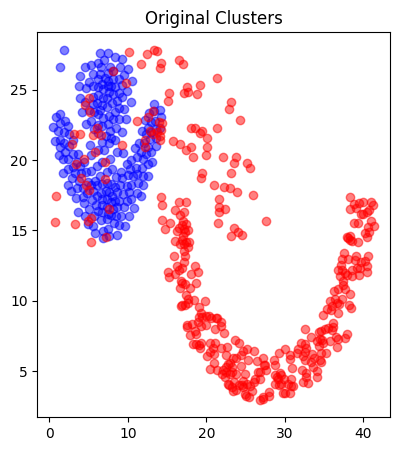

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data1[0], data1[1], c='blue', alpha=0.5)
plt.scatter(data2[0], data2[1], c='red', alpha=0.5)
plt.title('Original Clusters')

In [ ]:
def kmeans(data, k, max_iterations):
    #randomly select k data points as initial centroids
    centroids = data[np.random.choice(data.shape[0], k, replace=False), :]

    for i in range(max_iterations):
        #distance from each point to each centroid (Euclidean dis)
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        #assigning each point to the closest centroid
        labels = np.argmin(distances, axis=0)
        #updating the centroids to the mean of the assigned points
        for j in range(k):
            centroids[j] = data[labels == j].mean(axis=0)

    return labels

`centroids = data[np.random.choice(data.shape[0], k, replace=False), :]`

- `data.shape[0]` returns the number of rows in the `data` array.
- `np.random.choice(data.shape[0], k, replace=False)` randomly selects `k` row indices from the `data` array without replacement.
- `data[np.random.choice(data.shape[0], k, replace=False), :]` selects the rows corresponding to the randomly selected row indices.

we can't do <data - centroids> because the dimensions of the numpy array don't match and it will give errors.

To overcome, we reshape to add an additional axis:

```
reshaped_centroids = centroids[:, np.newaxis]

```






.sum(axis=2): This sums the squared differences along the axis 2, which corresponds to the feature dimension. This operation collapses the feature dimension and calculates the sum of squared differences for each data point and centroid pair.

- distances is a matrix of shape (k, n_samples) that contains the Euclidean distance between each data point and each centroid.
- np.argmin() returns the indices of the minimum values along a specified axis. In this case, axis=0 means that the minimum value is found along the rows of the distances matrix, which corresponds to each data point.
- The result of np.argmin() is an array of shape (n_samples,) that contains the index of the closest centroid for each data point. The index corresponds to the row number of the centroid in the centroids matrix.

In [ ]:
data1_labels = kmeans(data1.values, 2, 100)
data2_labels = kmeans(data2.values, 2, 100)



```
.values
```
turns Pandas df into Numpy array - dataframe is used for data manipulation and analysis where as array for functions(?)


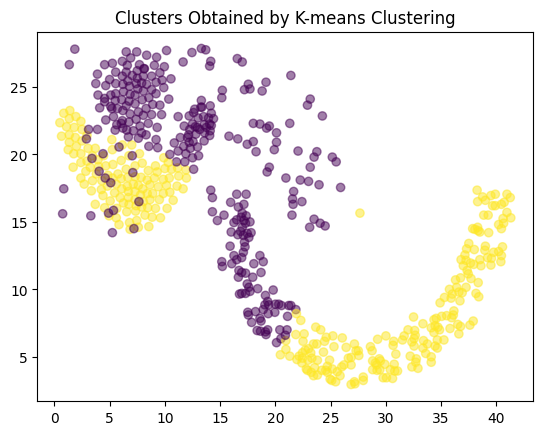

In [ ]:
plt.subplot(1, 1, 1)
plt.scatter(data1[0], data1[1], c=data1_labels, cmap='viridis', alpha=0.5)
plt.scatter(data2[0], data2[1], c=data2_labels, cmap='viridis', alpha=0.5)
plt.title('Clusters Obtained by K-means Clustering')
plt.show()

c parameter refers to colors of markers.
- can assign colors to it or
- let it specify colors based on a variable/sequence of values

Alt. method using convergence of means instead of a set no. of max iterations

In [ ]:
def kmeans(data, k, tol=1e-4):
    centroids = data[np.random.choice(data.shape[0], k, replace=False), :]
    old_centroids = np.zeros_like(centroids)
    #loop until convergence
    while np.abs(centroids - old_centroids).max() > tol:
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        old_centroids = centroids.copy()
        for j in range(k):
            centroids[j] = data[labels == j].mean(axis=0)

    return labels

In [ ]:
data1_labels = kmeans(data1.values, 2)
data2_labels = kmeans(data2.values, 2)

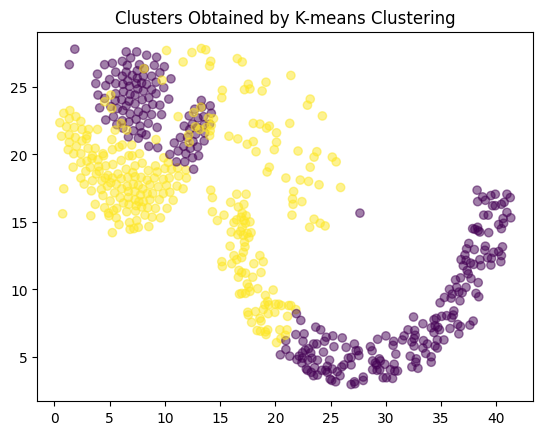

In [ ]:
plt.subplot(1, 1, 1)
plt.scatter(data1[0], data1[1], c=data1_labels, cmap='viridis', alpha=0.5)
plt.scatter(data2[0], data2[1], c=data2_labels, cmap='viridis', alpha=0.5)
plt.title('Clusters Obtained by K-means Clustering')
plt.show()

# Task 2 - Using Sklearn library

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k = 2
data1_kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(data1)
data2_kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(data2)

data1_labels = data1_kmeans.labels_
data2_labels = data2_kmeans.labels_
#obtain cluster labels for each point

data1_centroids = data1_kmeans.cluster_centers_
data2_centroids = data2_kmeans.cluster_centers_
#obtain centroids for each cluster

n_init is number of iterations

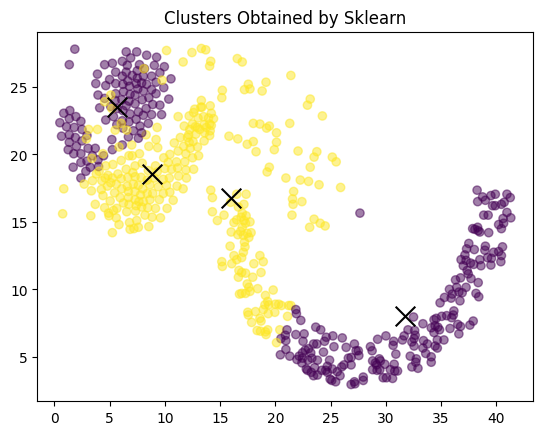

In [ ]:
plt.subplot(1, 1, 1)
plt.scatter(data1[0], data1[1], c=data1_labels, cmap='viridis', alpha=0.5)
plt.scatter(data2[0], data2[1], c=data2_labels, cmap='viridis', alpha=0.5)
plt.scatter(data1_centroids[:, 0], data1_centroids[:, 1], c='black', marker='x', s=200)
plt.scatter(data2_centroids[:, 0], data2_centroids[:, 1], c='black', marker='x', s=200)
plt.title('Clusters Obtained by Sklearn')
plt.show()

Changing the distance metric to Manhattan Distance:

In [ ]:
k = 2
#data1_kmeans = KMeans(n_clusters=k, n_init=10, random_state=0, metric='manhattan').fit(data1)
#data2_kmeans = KMeans(n_clusters=k, n_init=10, random_state=0, metric='manhattan').fit(data2)

from sklearn.metrics import pairwise_distances
data1_distances = pairwise_distances(data1, metric='manhattan')
data2_distances = pairwise_distances(data2, metric='manhattan')

data1_kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(data1_distances)
data2_kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(data2_distances)

data1_labels = data1_kmeans.labels_
data2_labels = data2_kmeans.labels_

data1_centroids = data1_kmeans.cluster_centers_
data2_centroids = data2_kmeans.cluster_centers_

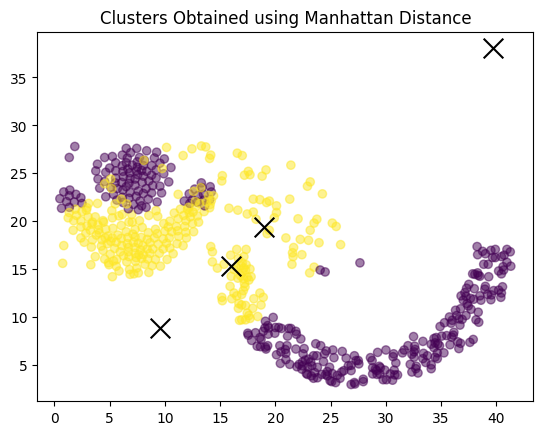

In [ ]:
plt.subplot(1, 1, 1)
plt.scatter(data1[0], data1[1], c=data1_labels, cmap='viridis', alpha=0.5)
plt.scatter(data2[0], data2[1], c=data2_labels, cmap='viridis', alpha=0.5)
plt.scatter(data1_centroids[:, 0], data1_centroids[:, 1], c='black', marker='x', s=200)
plt.scatter(data2_centroids[:, 0], data2_centroids[:, 1], c='black', marker='x', s=200)
plt.title('Clusters Obtained using Manhattan Distance')
plt.show()

Decreasing the number of iterations:

In [ ]:
k = 2
data1_kmeans = KMeans(n_clusters=k, n_init=1, random_state=0).fit(data1)
data2_kmeans = KMeans(n_clusters=k, n_init=1, random_state=0).fit(data2)

data1_labels = data1_kmeans.labels_
data2_labels = data2_kmeans.labels_

data1_centroids = data1_kmeans.cluster_centers_
data2_centroids = data2_kmeans.cluster_centers_

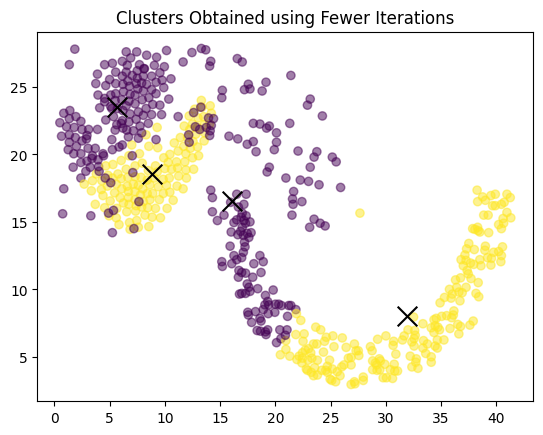

In [ ]:
plt.subplot(1, 1, 1)
plt.scatter(data1[0], data1[1], c=data1_labels, cmap='viridis', alpha=0.5)
plt.scatter(data2[0], data2[1], c=data2_labels, cmap='viridis', alpha=0.5)
plt.scatter(data1_centroids[:, 0], data1_centroids[:, 1], c='black', marker='x', s=200)
plt.scatter(data2_centroids[:, 0], data2_centroids[:, 1], c='black', marker='x', s=200)
plt.title('Clusters Obtained using Fewer Iterations')
plt.show()

Changing the initialization (seed) method:

In [ ]:
k = 2
data1_kmeans = KMeans(n_clusters=k, n_init=10, init='random', random_state=0).fit(data1)
data2_kmeans = KMeans(n_clusters=k, n_init=10, init='random', random_state=0).fit(data2)

data1_labels = data1_kmeans.labels_
data2_labels = data2_kmeans.labels_

data1_centroids = data1_kmeans.cluster_centers_
data2_centroids = data2_kmeans.cluster_centers_

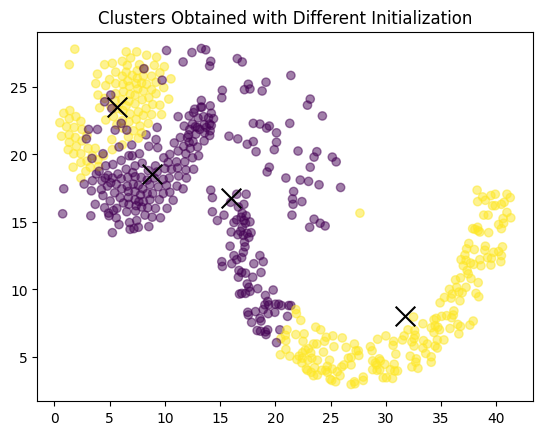

In [ ]:
plt.subplot(1, 1, 1)
plt.scatter(data1[0], data1[1], c=data1_labels, cmap='viridis', alpha=0.5)
plt.scatter(data2[0], data2[1], c=data2_labels, cmap='viridis', alpha=0.5)
plt.scatter(data1_centroids[:, 0], data1_centroids[:, 1], c='black', marker='x', s=200)
plt.scatter(data2_centroids[:, 0], data2_centroids[:, 1], c='black', marker='x', s=200)
plt.title('Clusters Obtained with Different Initialization')
plt.show()

# Task 3 - Shop Dataset

In [ ]:
from sklearn.metrics import silhouette_score, adjusted_rand_score
#silhouette_score evaluates quality of clusters - how weel samples are clustered
#with other samples that they are similar to

In [ ]:
df = pd.read_csv('shop.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

Finding Optimal No. of Clusters:

In [ ]:
X = df.iloc[:, 1:5].values
wcss = [] # within-cluster sum of squares
silhouette_scores = []
rand_scores = [] #lists to store scores for each cluster
for i in range(2, 11): # diff k values
    kmeans = KMeans(n_clusters=i, n_init = 'auto', init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    rand_scores.append(adjusted_rand_score(df['cluster'], kmeans.labels_))

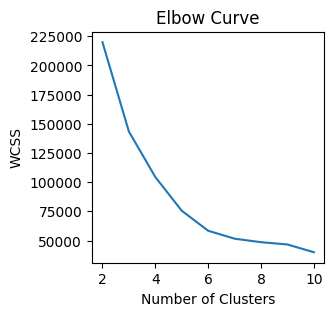

In [ ]:
plt.figure(figsize=(3,3))
plt.plot(range(2, 11), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The optimal number of clusters is often considered to be the point on the elbow curve where the rate of decrease in WCSS significantly slows down. This point represents a good balance between the compactness of the clusters and the simplicity of the model.

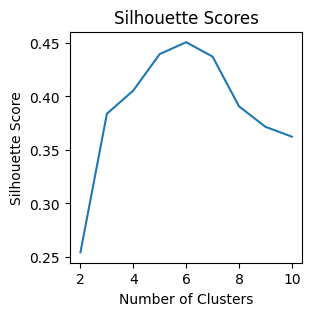

In [ ]:
plt.figure(figsize=(3,3))
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

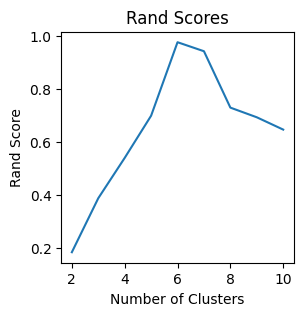

In [ ]:
plt.figure(figsize=(3,3))
plt.plot(range(2, 11), rand_scores)
plt.title('Rand Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Rand Score')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, n_init ='auto', init='k-means++', random_state=42)
kmeans.fit(X)
df['cluster'] = kmeans.labels_

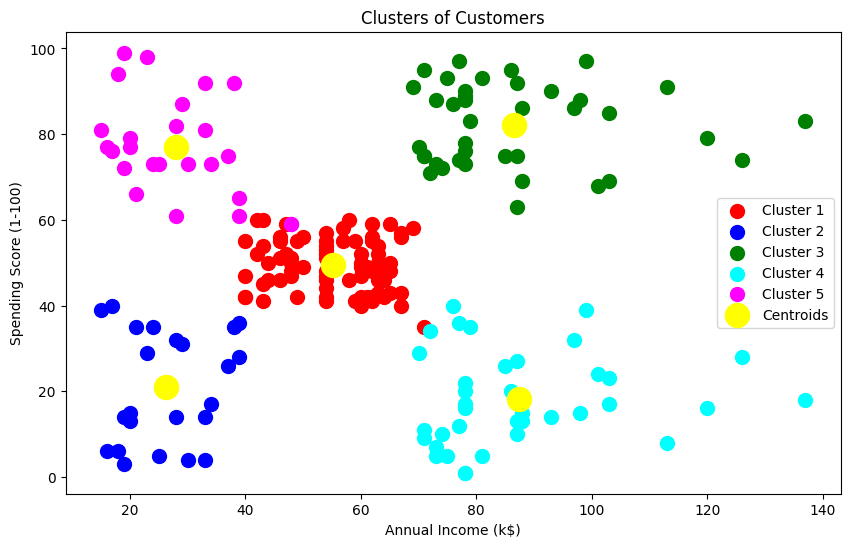

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    ax.scatter(X[df['cluster'] == i, 2], X[df['cluster'] == i, 3], s=100, c=colors[i], label='Cluster {}'.format(i+1))
ax.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=300, c='yellow', label='Centroids')
ax.set_title('Clusters of Customers')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.legend()
plt.show()

In [ ]:
print('Silhouette Score:', silhouette_score(X, kmeans.labels_))
print('Rand Score:', adjusted_rand_score(df['cluster'], kmeans.labels_))

Silhouette Score: 0.43959178858284587
Rand Score: 1.0
